Check that MEEM code for excitation phase is correct by comparing it with WAMIT data.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../'))
from multi_condensed import Problem
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Basic import
df = pd.read_csv("data/WAMIT_exc_phase.csv")
wamit_phases = df["excitation phase (rad)"]

In [3]:
# Solving and Plotting Functions

def modify_and_solve(prob, a_matrix, b_vector, m0):
  prob.change_m0(m0)
  a_matrix = prob.a_matrix_from_old(a_matrix)
  b_vector = prob.b_vector_from_old(b_vector)
  x = prob.get_unknown_coeffs(a_matrix, b_vector)
  return prob.excitation_phase(x)

In [12]:
h = 300
a = [3, 10]
d = [35, 2]
omegas = [0.02 * entry for entry in list(range(1, 261))]
rho = 1023
heaving = [1, 1]
NMK = [50, 50, 50]

prob = Problem(h, d, a, heaving, NMK, 1, rho)
m0s = [prob.wavenumber(omega) for omega in omegas]
a_matrix = prob.a_matrix()
b_vector = prob.b_vector()
exc_phases = [modify_and_solve(prob, a_matrix, b_vector, m0) for m0 in m0s]

Text(0.5, 1.0, 'MEEM - WAMIT excitation phase comparison')

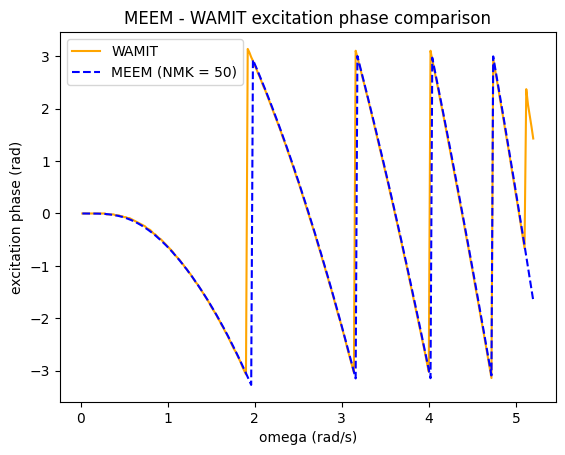

In [13]:
wamit_negative_phases = [-1 * entry for entry in wamit_phases]
plt.plot(omegas, wamit_negative_phases, label = "WAMIT", linestyle = "-", color = "orange")
plt.plot(omegas, exc_phases, label = "MEEM (NMK = 50)", linestyle = "--", color = "blue")

plt.xlabel("omega (rad/s)")
plt.ylabel("excitation phase (rad)")
plt.legend()
plt.title("MEEM - WAMIT excitation phase comparison")

Text(0.5, 1.0, 'difference in MEEM - WAMIT excitation phases')

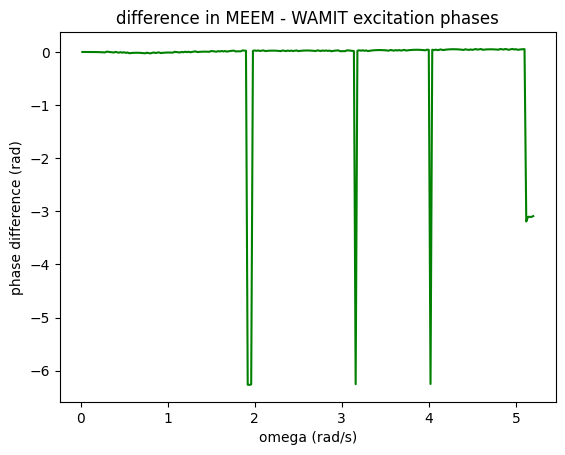

In [14]:
diff = [exc_phases[i] - wamit_negative_phases[i] for i in range(260)]

plt.plot(omegas, diff, color = "green")

plt.xlabel("omega (rad/s)")
plt.ylabel("phase difference (rad)")
plt.title("difference in MEEM - WAMIT excitation phases")

# basically zero, except when it's 2pi.